# Cost of International Education

![](https://i.ibb.co/dsRdmgtK/hq720.jpg)

# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Dataset

In [3]:
df = pd.read_csv('International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


# 3. Exploring Data

In [4]:
print('Dataset shape:', df.shape)

Dataset shape: (907, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [6]:
duplicate_values = df.duplicated().sum()
print("Duplicate Values:", duplicate_values)

Duplicate Values: 0


In [7]:
missing = df.isna().sum()
print('Missing Values Per Column:\n\n', missing)

Missing Values Per Column:

 Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64


In [8]:
print("Country Value Counts:\n\n", df.Country.value_counts().head(10))

Country Value Counts:

 Country
UK             93
Australia      86
USA            78
Canada         76
Germany        33
France         27
South Korea    23
Netherlands    21
Switzerland    20
Singapore      18
Name: count, dtype: int64


In [9]:
avg_tuition = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)
print('Average Tuition by Country:\n\n', avg_tuition.head(10))  

Average Tuition by Country:

 Country
USA            47742.307692
Australia      34610.465116
Singapore      34172.222222
UK             30341.935484
Canada         29456.578947
New Zealand    29333.333333
UAE            24687.500000
Hong Kong      22000.000000
Ireland        17890.000000
Lebanon        14200.000000
Name: Tuition_USD, dtype: float64


In [10]:
print("Column Names:\n\n", df.columns) 

Column Names:

 Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')


# 4. Data Visualization

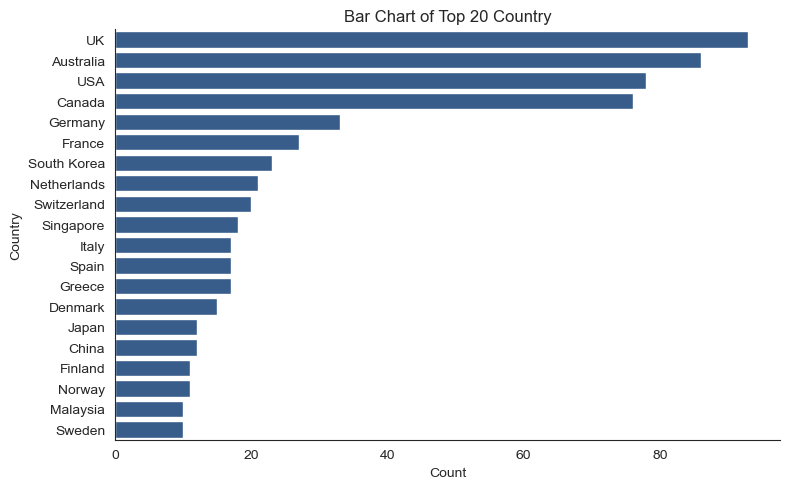

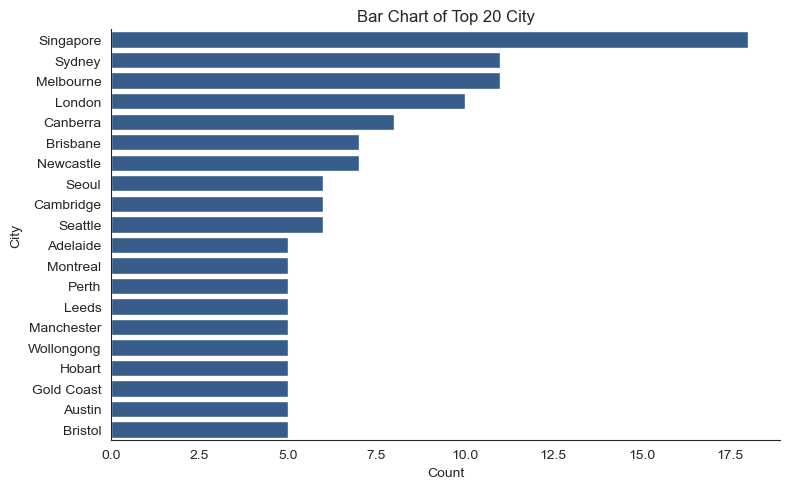

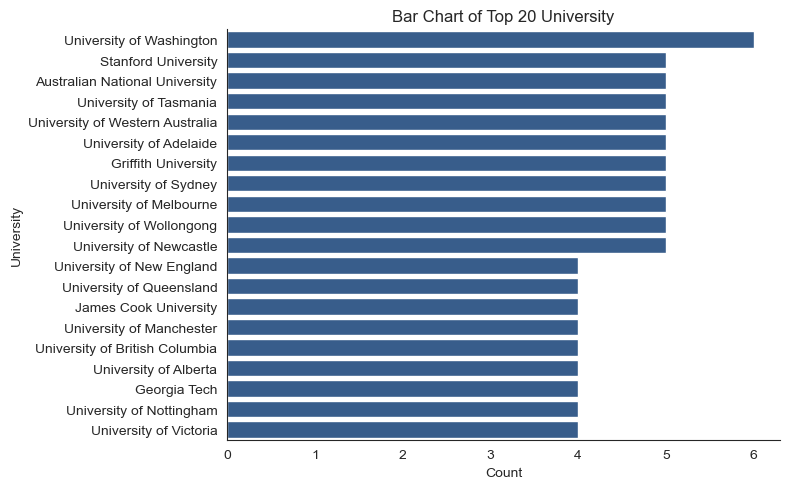

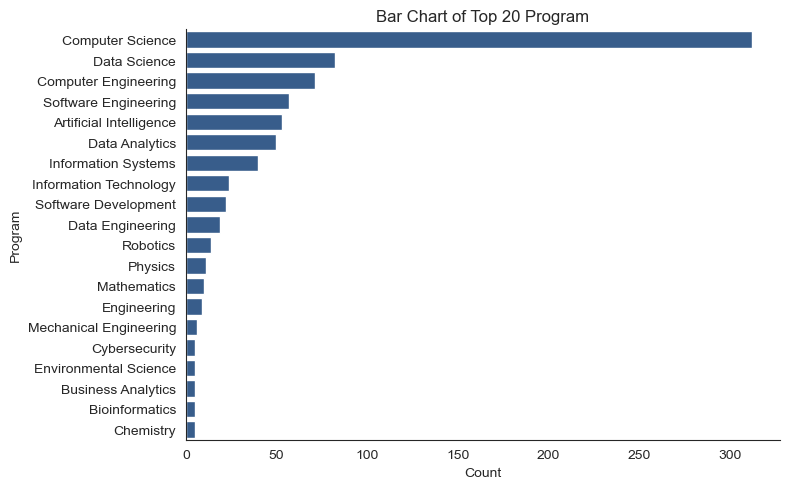

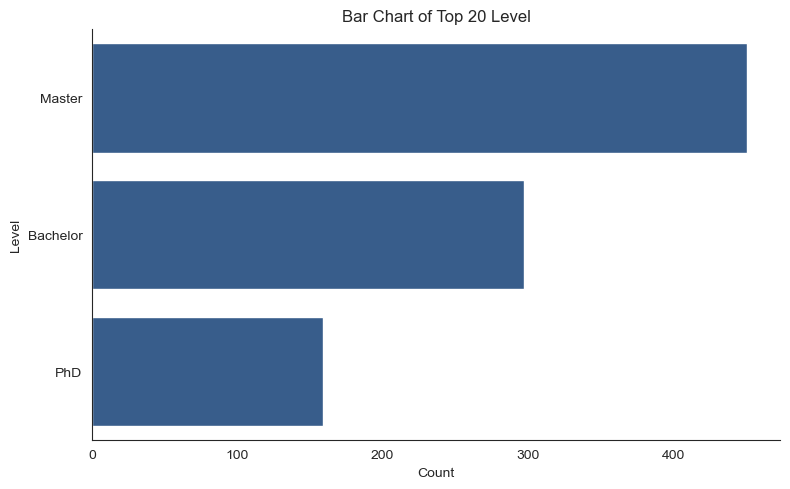

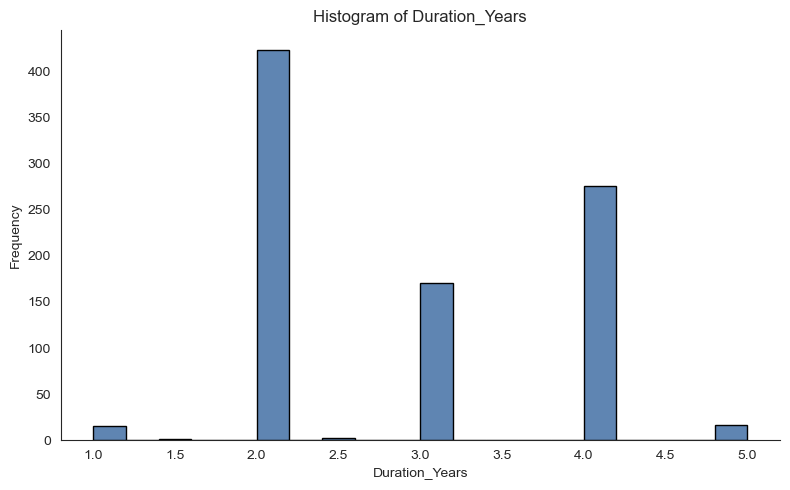

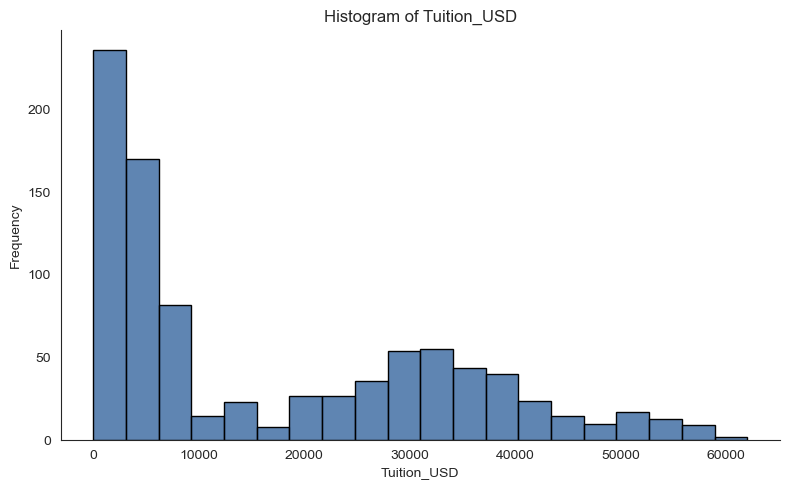

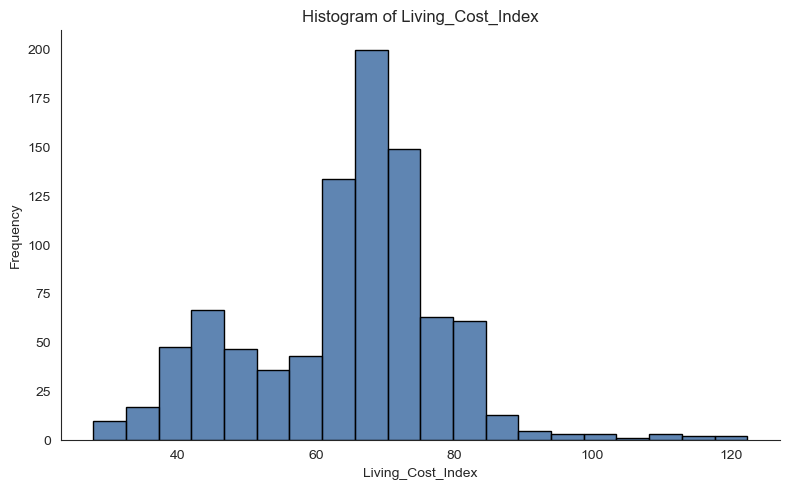

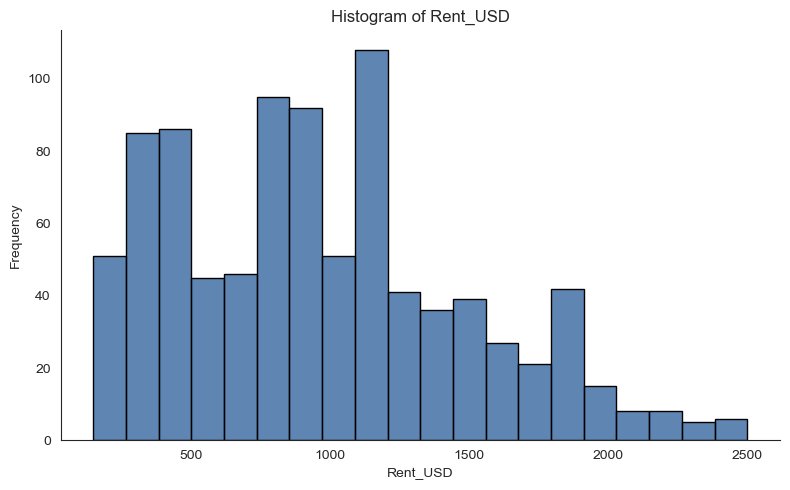

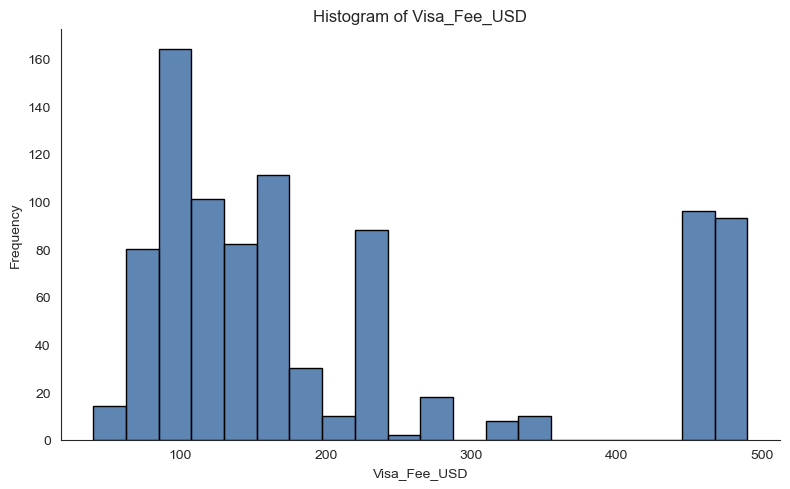

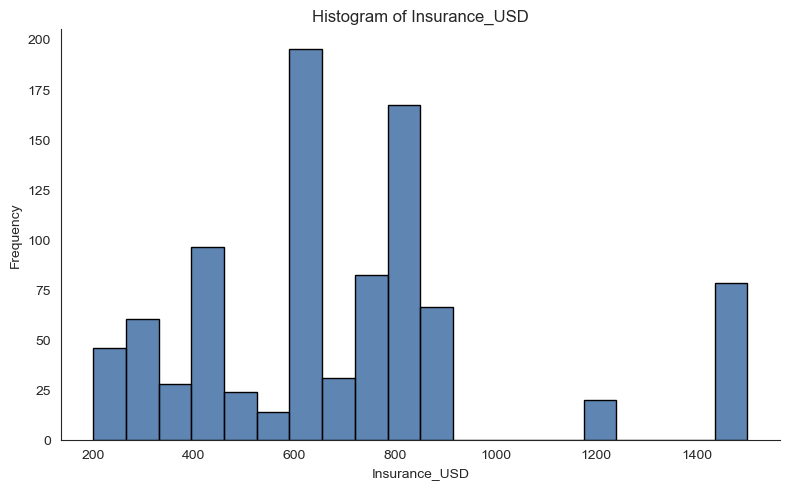

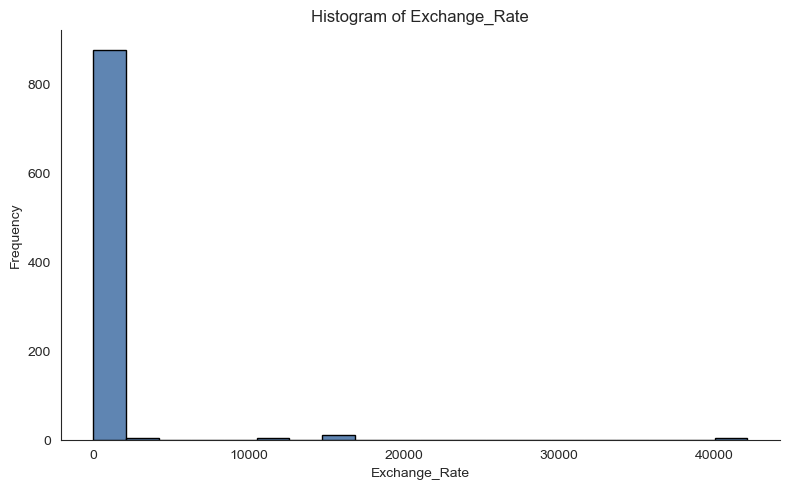

In [11]:
# Set clean style
sns.set_style("white")

# Unified professional color
professional_color = "#2A5C99"  # Navy blue

for col in df:
    plt.figure(figsize=(8, 5))

    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], bins=20, edgecolor='black', color=professional_color)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        top_categories = df[col].value_counts().head(20)
        sns.barplot(x=top_categories.values, y=top_categories.index, color=professional_color)
        plt.title(f'Bar Chart of Top 20 {col}')
        plt.xlabel('Count')
        plt.ylabel(col)

    # Clean formatting
    ax = plt.gca()
    ax.grid(False)
    for spine_name, spine in ax.spines.items():
        spine.set_visible(spine_name in ['left', 'bottom'])

    plt.tight_layout()
    plt.show()


### Average Tuition Fee by Country

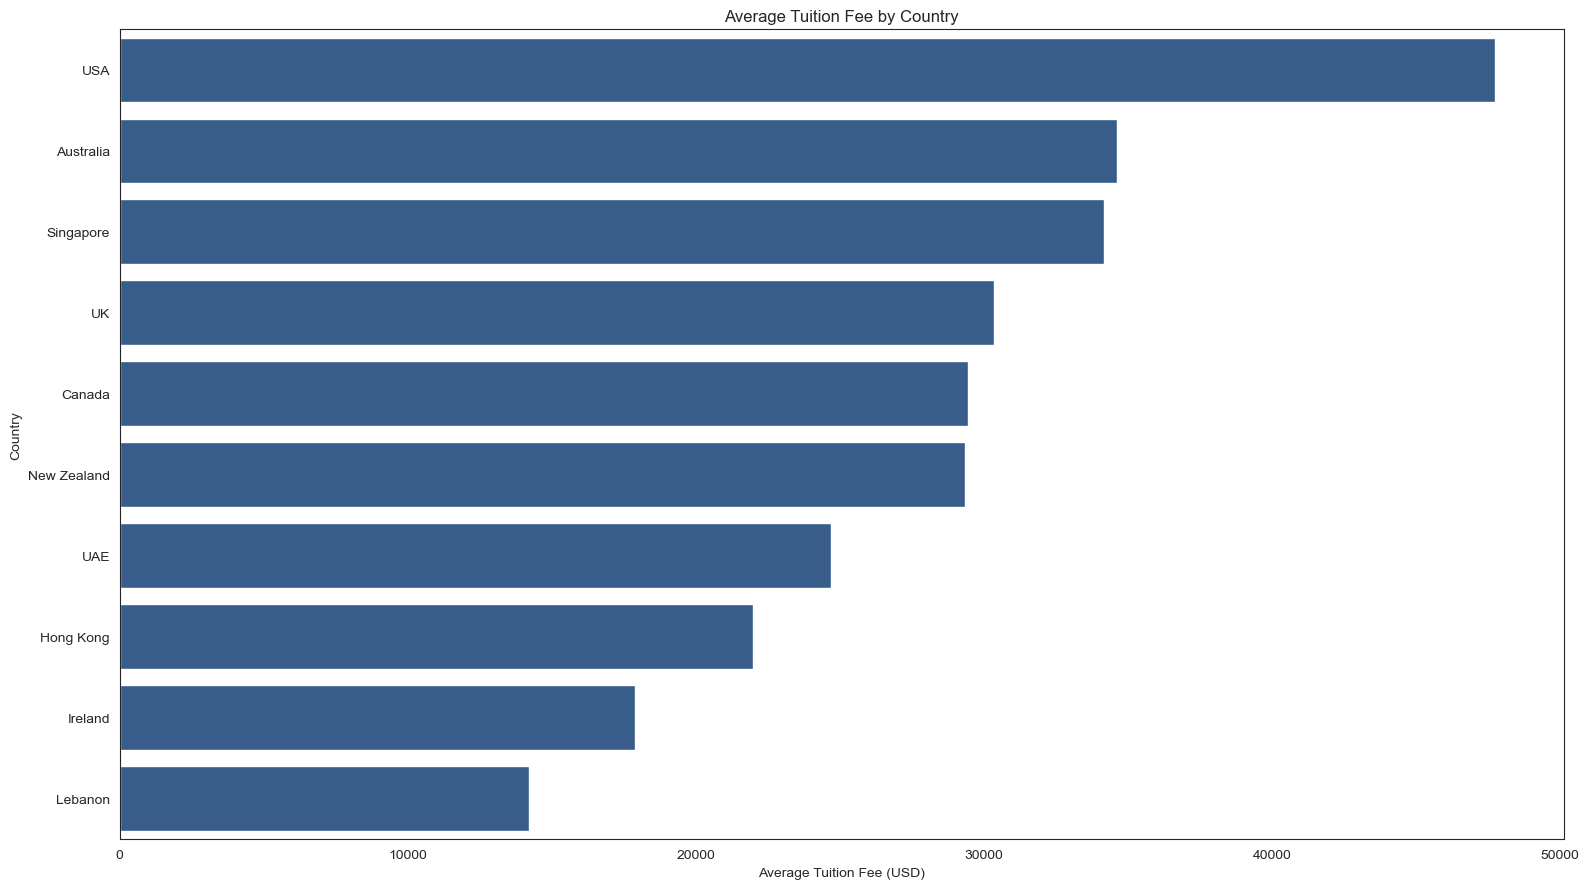

In [ ]:
avg_tuition_by_country = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False).head(10)

professional_color = "#2A5C99"  # Navy blue

plt.figure(figsize=(16, 9))
sns.barplot(x=avg_tuition_by_country.values, y=avg_tuition_by_country.index, color=professional_color)

plt.xlabel('Average Tuition Fee (USD)')
plt.ylabel('Country')
plt.title('Average Tuition Fee by Country')

plt.tight_layout()
plt.show()

### Number of Universities with Zero Tuition Fee by Country

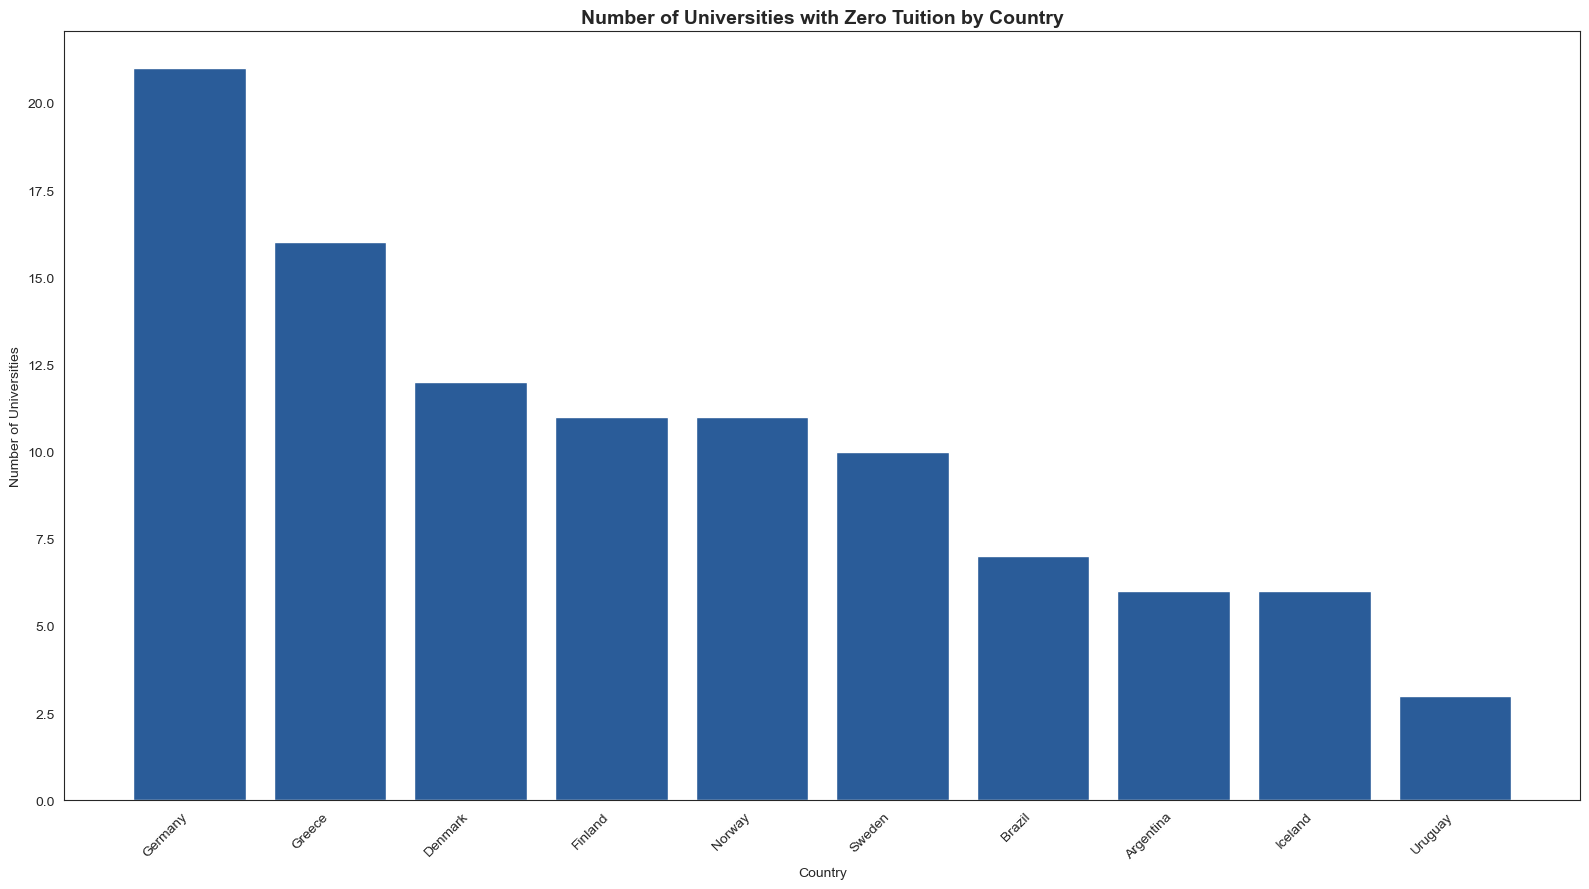

In [ ]:
# Filter for zero tuition
zero_tuition_df = df[df['Tuition_USD'] == 0]

# Count by country
country_counts = (
    zero_tuition_df.groupby('Country')
    .size()
    .reset_index(name='University_Count')
    .sort_values(by='University_Count', ascending=False)
    .head(20)
)

# Plot
plt.figure(figsize=(16, 9))
bars = plt.bar(range(len(country_counts)), country_counts['University_Count'], color="#2A5C99")

# Set the x-axis labels manually
plt.xticks(ticks=range(len(country_counts)), labels=country_counts['Country'], rotation=45, ha='right')

plt.title('Number of Universities with Zero Tuition by Country', fontsize=14, weight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.tight_layout()
plt.show()

### Top Universities by Zero-Tuition Program Count

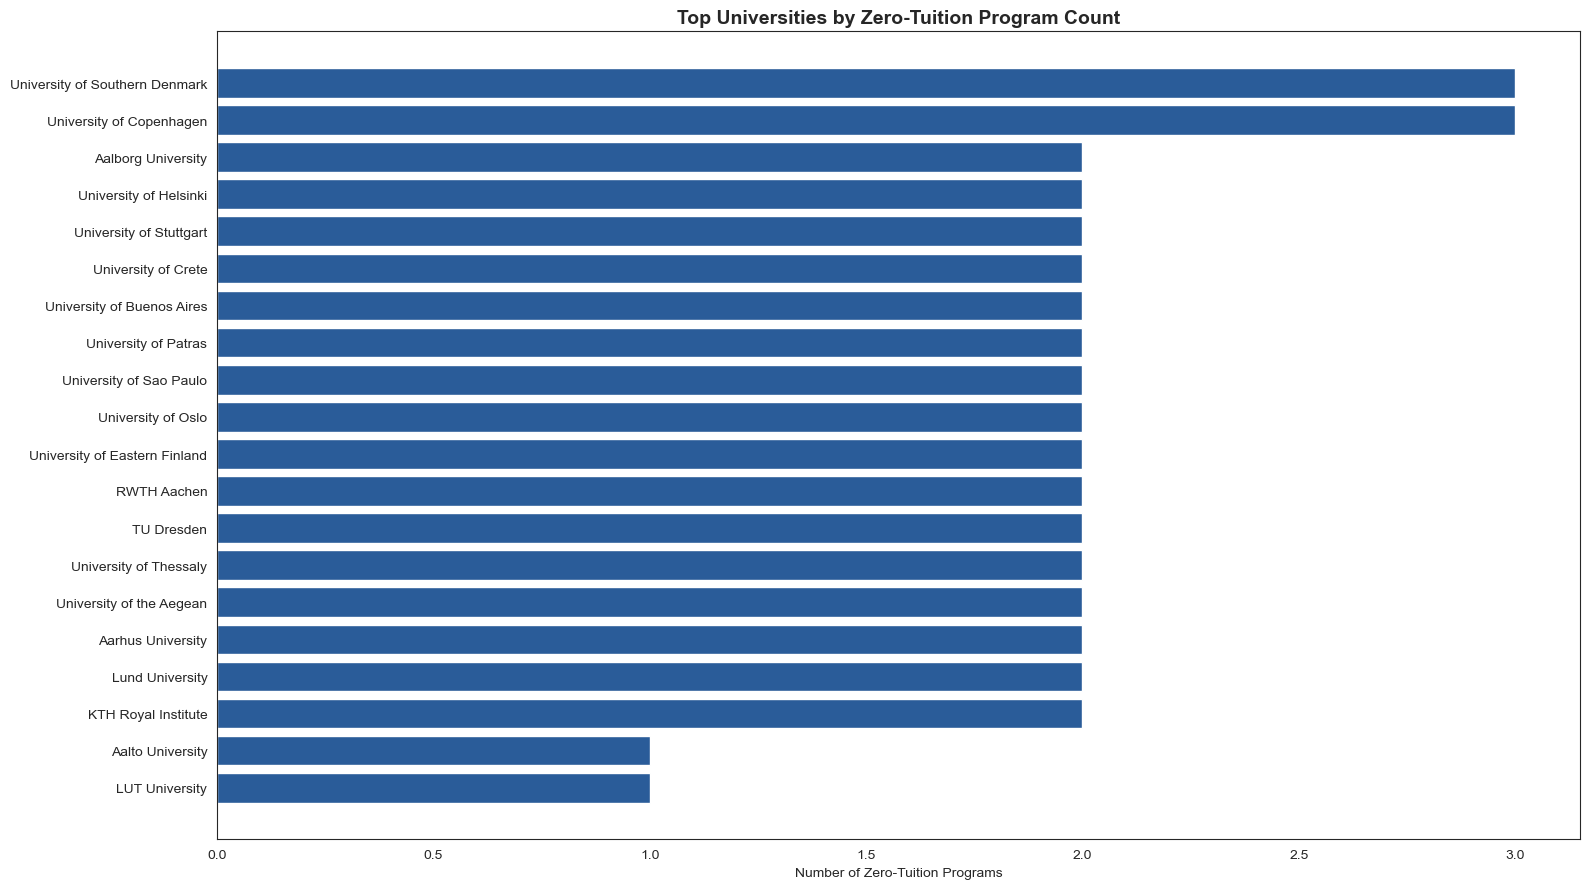

In [ ]:
# Filter for zero tuition programs
zero_tuition_df = df[df['Tuition_USD'] == 0]

# Group by university and count number of programs
program_counts = (
    zero_tuition_df.groupby('University')
    .size()
    .reset_index(name='Program_Count')
    .sort_values(by='Program_Count', ascending=False)
    .head(20)  # Show top 20
)

# Plot
plt.figure(figsize=(16, 9))
plt.barh(program_counts['University'], program_counts['Program_Count'], color="#2A5C99")
plt.xlabel('Number of Zero-Tuition Programs')
plt.title('Top Universities by Zero-Tuition Program Count', fontsize=14, weight='bold')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

### Top Free Programs by Number of Universities

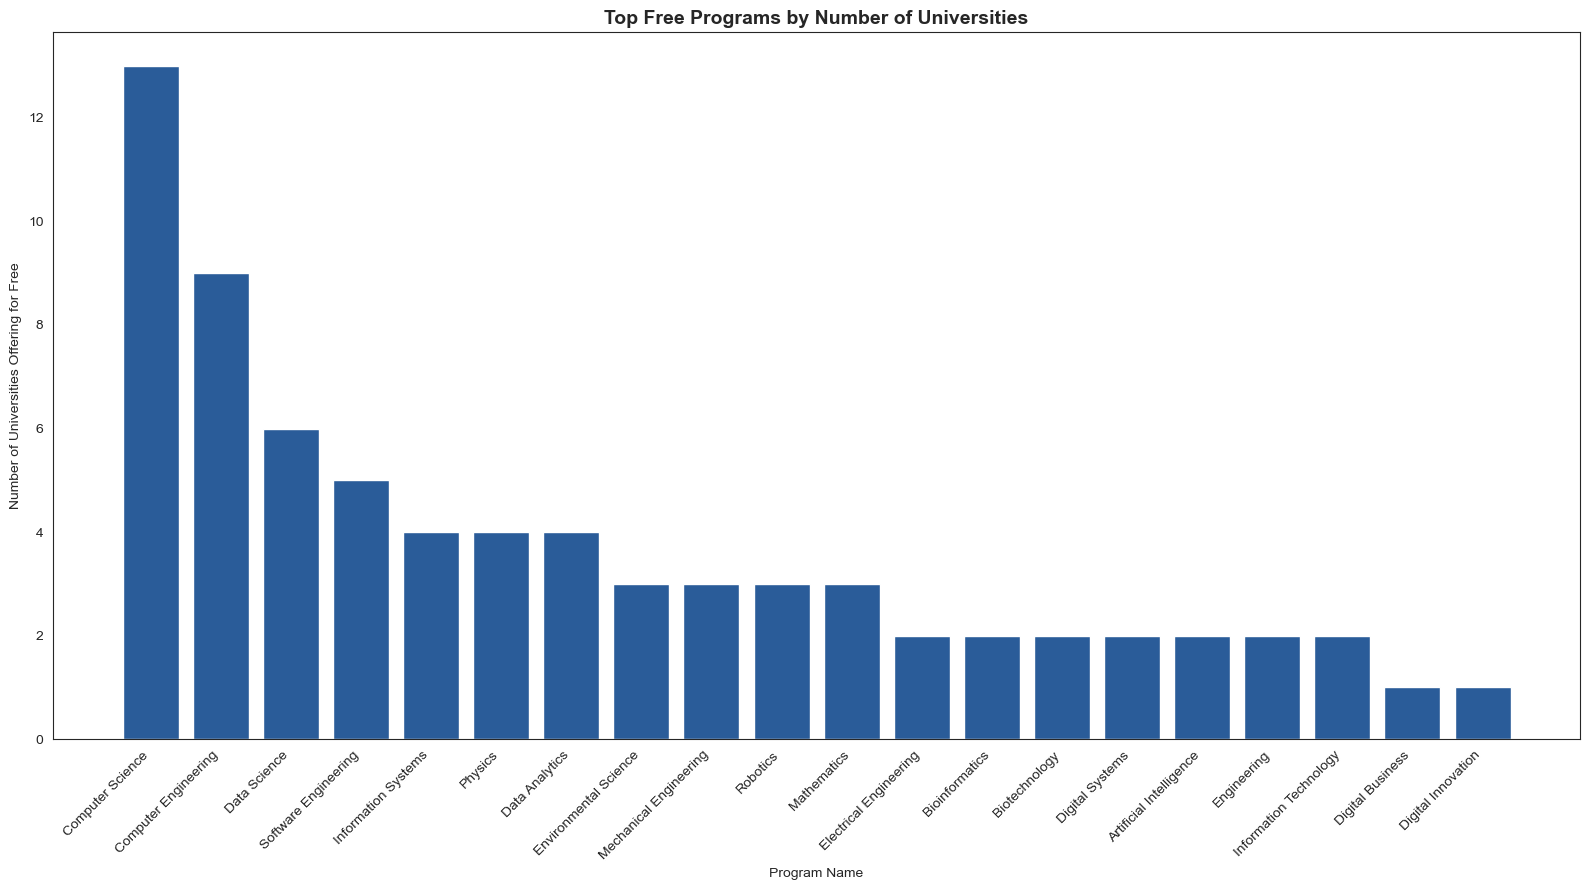

In [ ]:
# Filter for free tuition programs
zero_tuition_df = df[df['Tuition_USD'] == 0]

# Convert to strings in case of non-string entries
zero_tuition_df['Program'] = zero_tuition_df['Program'].astype(str)
zero_tuition_df['University'] = zero_tuition_df['University'].astype(str)

# Count how many unique universities offer each free program
program_university_count = (
    zero_tuition_df.groupby('Program')['University']
    .nunique()
    .reset_index(name='University_Count')
    .sort_values(by='University_Count', ascending=False)
    .head(20)  # Show top 20 programs
)

# Plot
plt.figure(figsize=(16, 9))
plt.bar(program_university_count['Program'], program_university_count['University_Count'], color="#2A5C99")
plt.title('Top Free Programs by Number of Universities', fontsize=14, weight='bold')
plt.xlabel('Program Name')
plt.ylabel('Number of Universities Offering for Free')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Living Cost vs Countries with Zero Tuition Fee

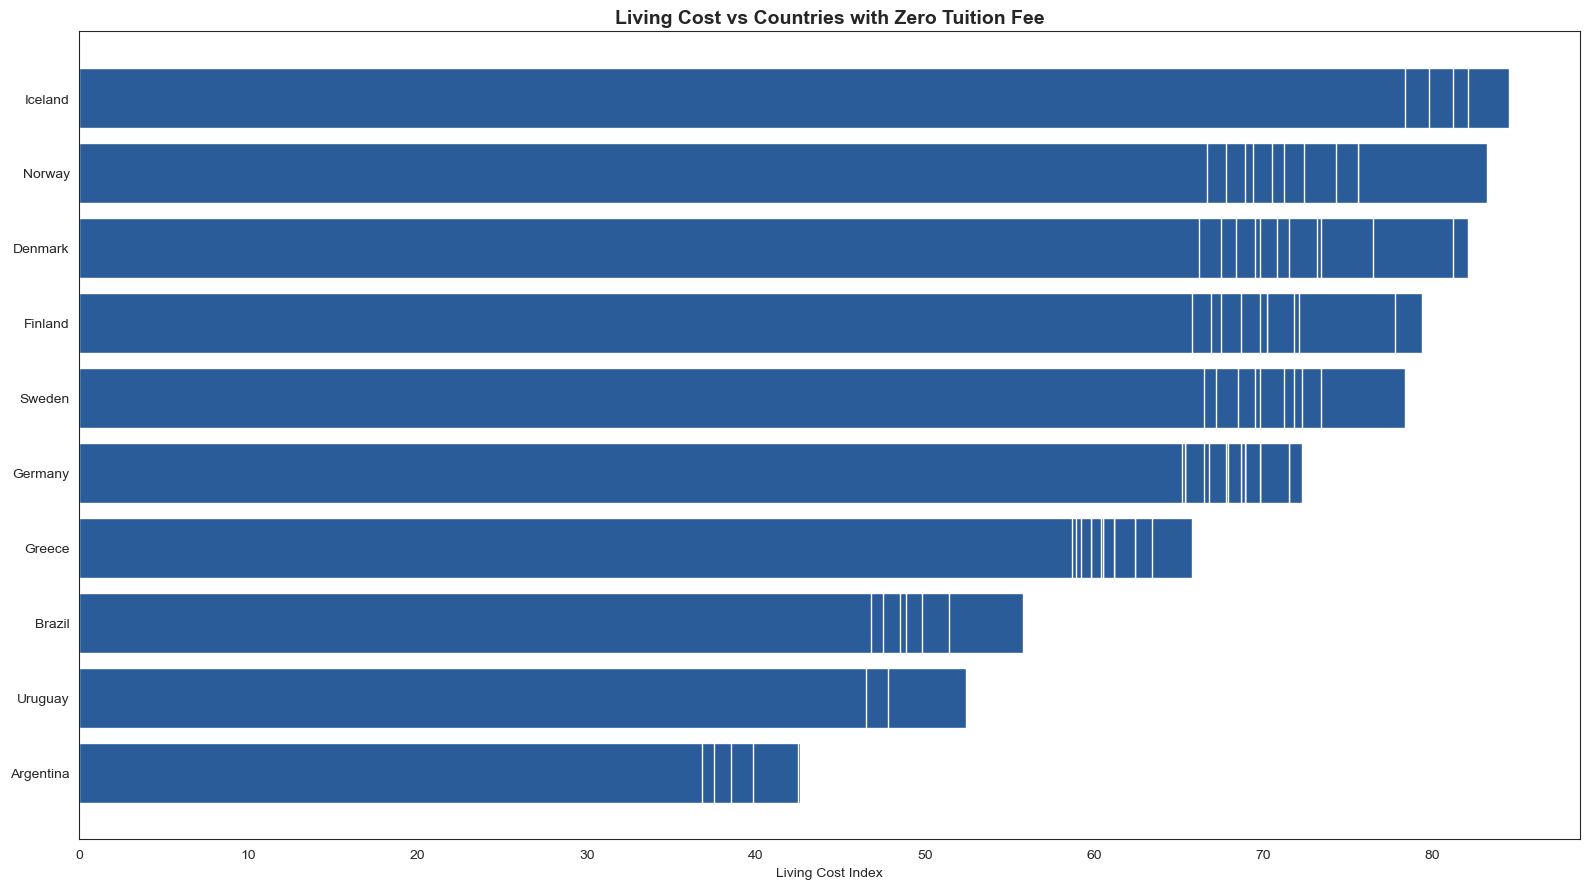

In [ ]:
# Filter for countries with zero tuition fee
zero_tuition_df = df[df['Tuition_USD'] == 0]

# Sort countries by Living Cost Index for better visualization
zero_tuition_df_sorted = zero_tuition_df.sort_values(by='Living_Cost_Index', ascending=False)

# Plot
plt.figure(figsize=(16, 9))
plt.barh(zero_tuition_df_sorted['Country'], zero_tuition_df_sorted['Living_Cost_Index'], color="#2A5C99")
plt.xlabel('Living Cost Index')
plt.title('Living Cost vs Countries with Zero Tuition Fee', fontsize=14, weight='bold')
plt.gca().invert_yaxis()  # Show highest living cost at the top
plt.tight_layout()
plt.show()

### Average Tuition Fee by Program and Level

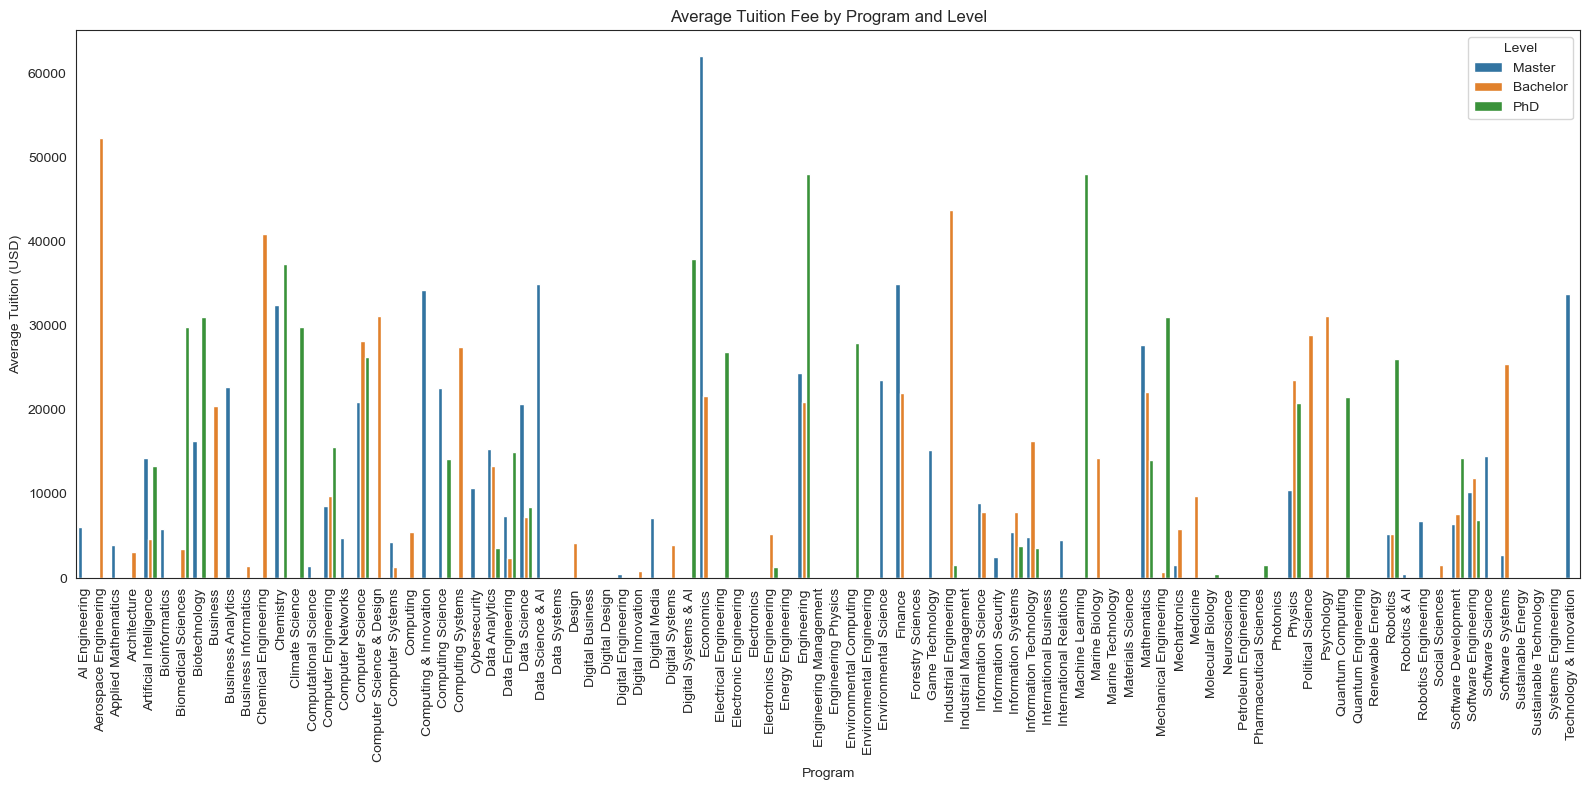

In [17]:
sns.set_style("white")
professional_color = "#2A5C99"  # Navy blue

# Group and reset index
tuition_grouped = df.groupby(['Program', 'Level'])['Tuition_USD'].mean().reset_index()

# Create grouped bar plot
plt.figure(figsize=(16, 8))
sns.barplot(
    data=tuition_grouped,
    x='Program',
    y='Tuition_USD',
    hue='Level',
)

plt.title('Average Tuition Fee by Program and Level')
plt.xlabel('Program')
plt.ylabel('Average Tuition (USD)')
plt.xticks(rotation=90)
plt.legend(title='Level')
plt.tight_layout()
plt.show()

### Living Cost Index vs. Rent (USD)

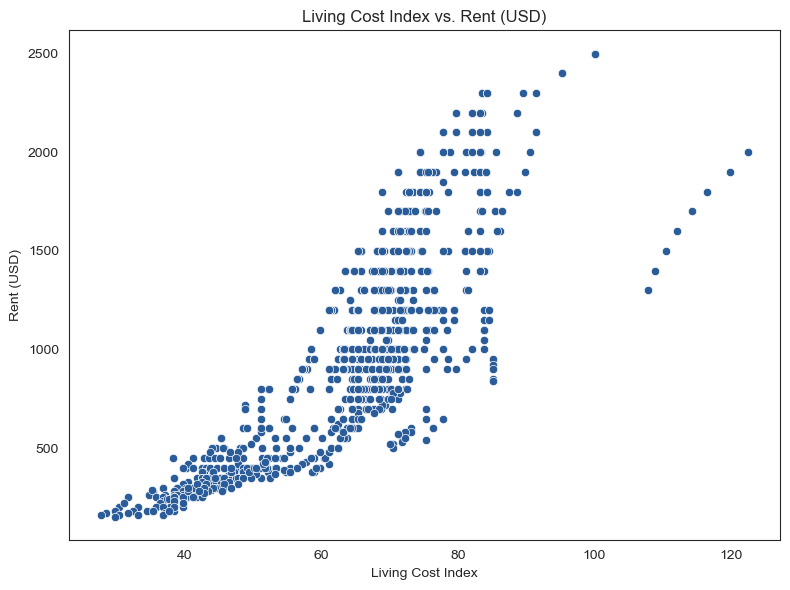

In [18]:
# Set clean white style
sns.set_style("white")

# Define professional color
professional_color = "#2A5C99"  # Navy blue

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Living_Cost_Index',
    y='Rent_USD',
    color=professional_color
)

plt.title('Living Cost Index vs. Rent (USD)')
plt.xlabel('Living Cost Index')
plt.ylabel('Rent (USD)')

plt.tight_layout()
plt.show()

### Tuition Fees vs. Living Cost Index

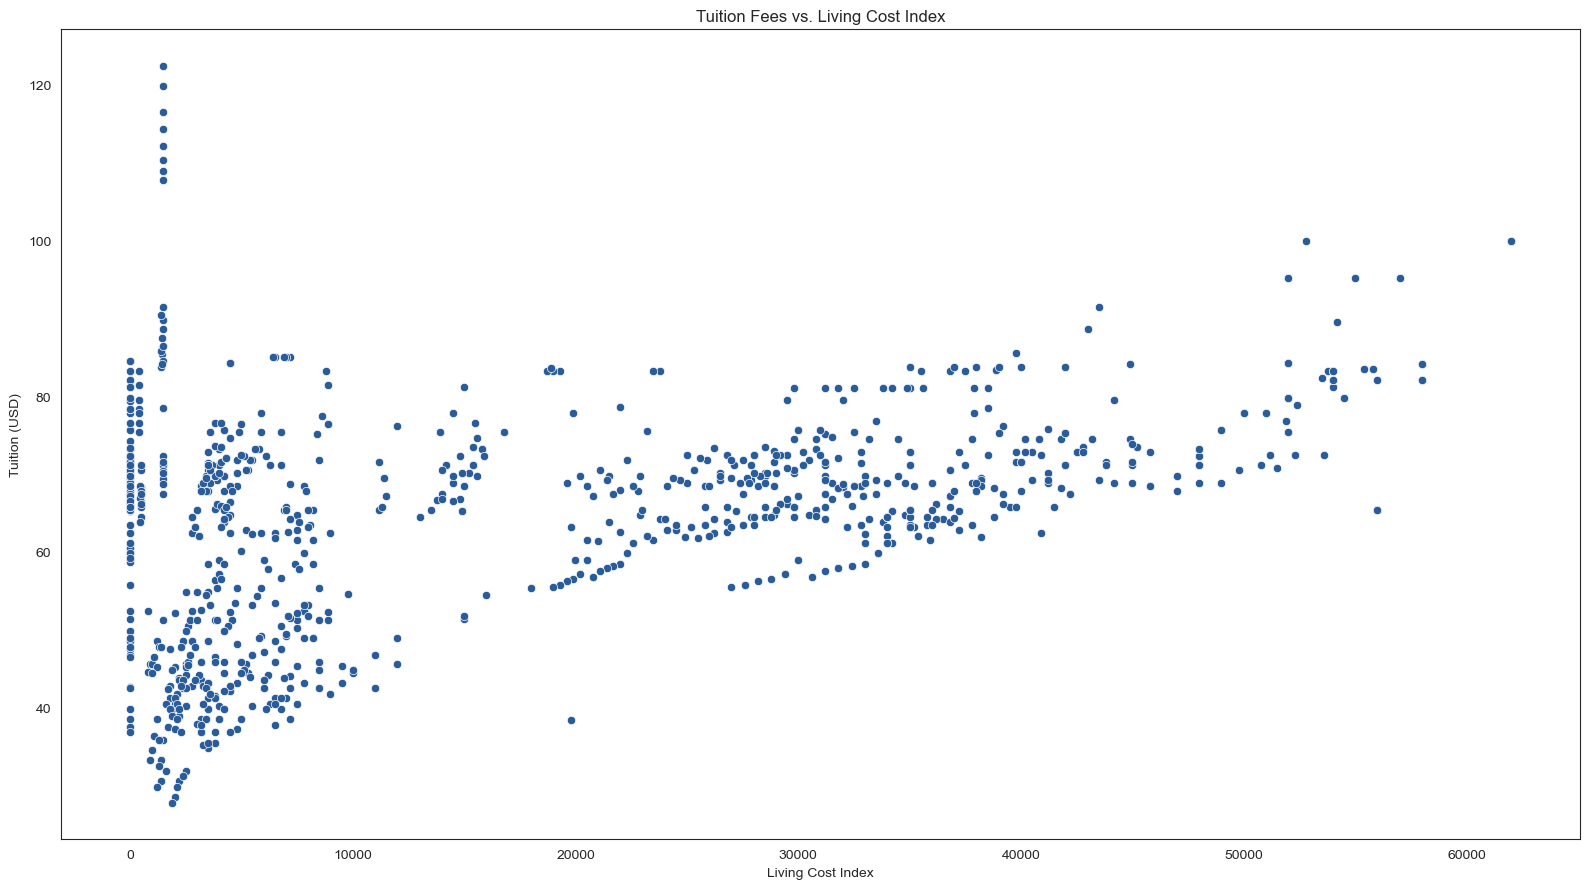

In [ ]:
# Set clean white style
sns.set_style("white")

# Define professional color
professional_color = "#2A5C99"  # Navy blue

# Create scatter plot
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=df,
    x='Tuition_USD',
    y='Living_Cost_Index',
    color=professional_color
)

# Add title and labels
plt.title('Tuition Fees vs. Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Tuition (USD)')

plt.tight_layout()
plt.show()

### Top 20 Countries by Living Cost Index

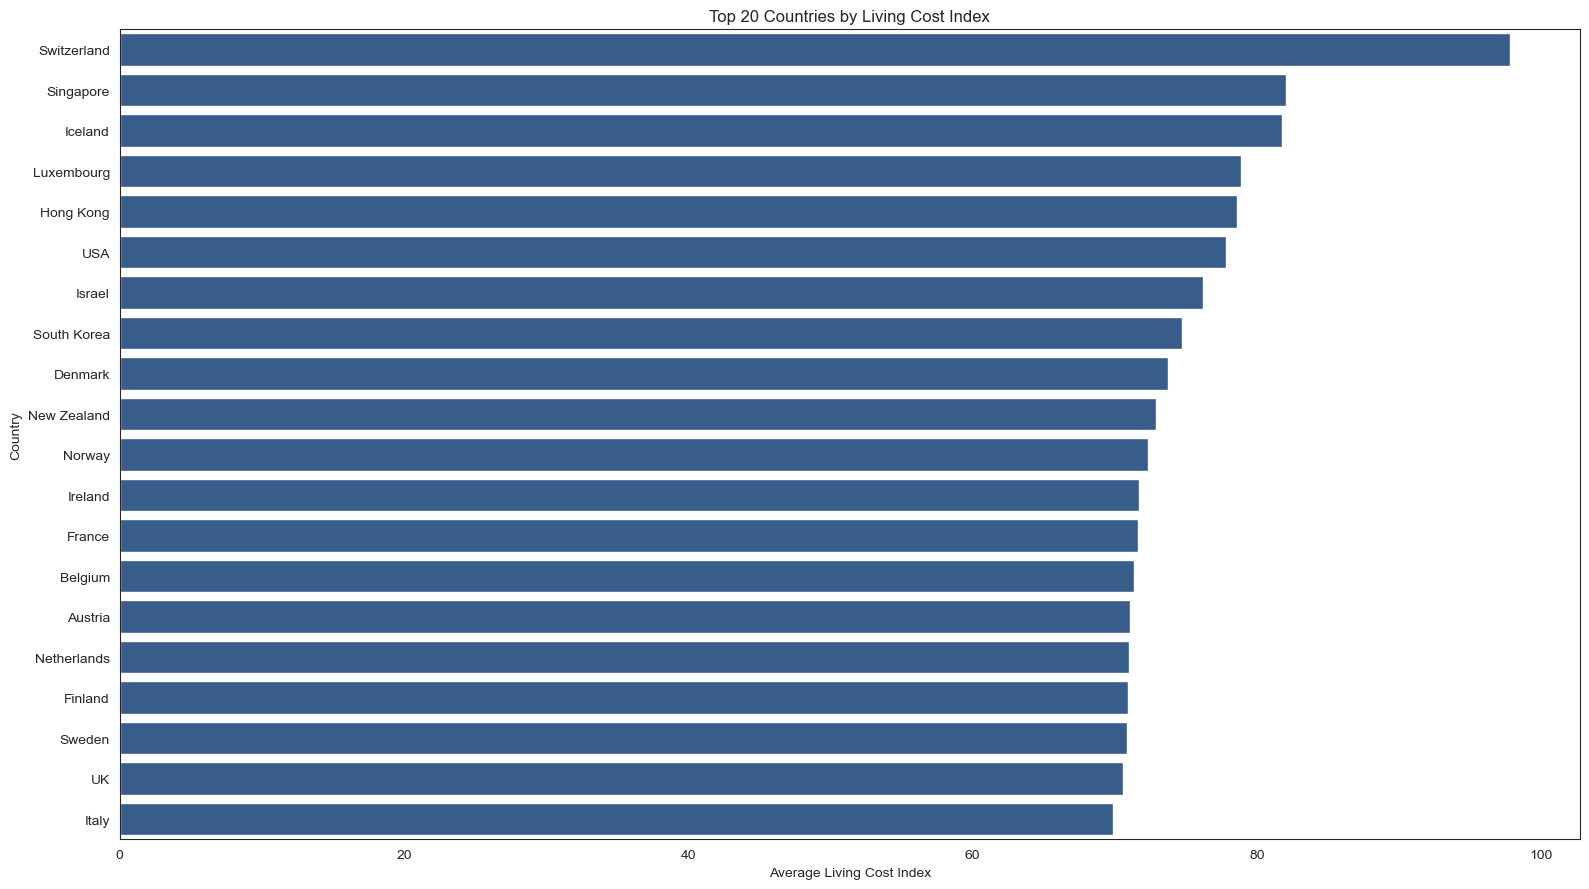

In [ ]:
sns.set_style("white")

# Professional color
professional_color = "#2A5C99"

# Group by country and compute average living cost
avg_living_cost = df.groupby('Country')['Living_Cost_Index'].mean().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(16, 9))
sns.barplot(
    x=avg_living_cost.values,
    y=avg_living_cost.index,
    color=professional_color
)

# Add labels and title
plt.title('Top 20 Countries by Living Cost Index')
plt.xlabel('Average Living Cost Index')
plt.ylabel('Country')
plt.xticks()

plt.tight_layout()
plt.show()

### Tuition Distribution by Degree Level

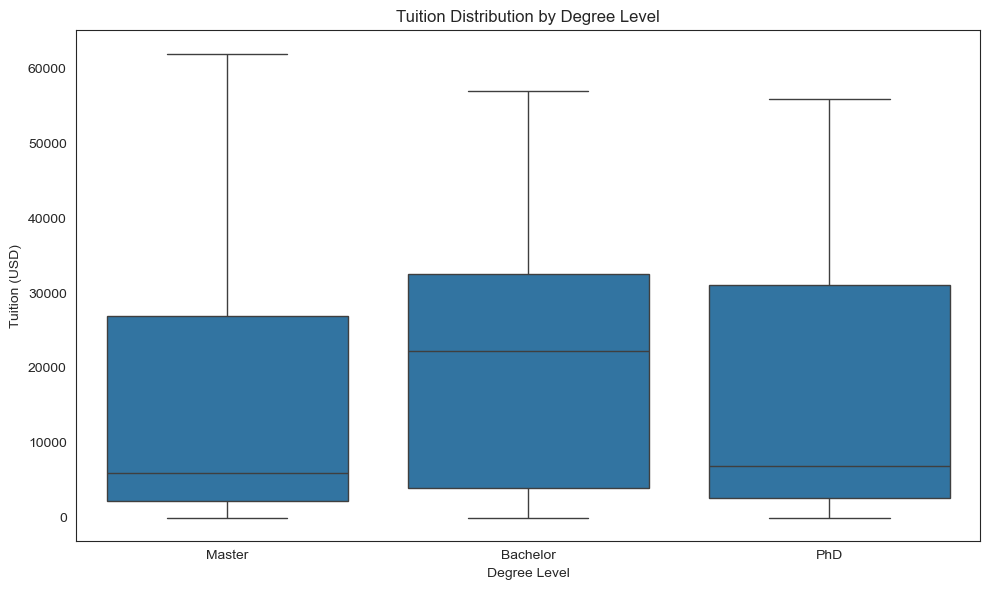

In [21]:
# Set clean style
sns.set_style("white")

# Professional navy blue
professional_color = "#2A5C99"

# Plot tuition distribution by degree level
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Level',
    y='Tuition_USD'
)

# Labels and title
plt.title('Tuition Distribution by Degree Level')
plt.xlabel('Degree Level')
plt.ylabel('Tuition (USD)')


plt.tight_layout()
plt.show()

### Geographic Distribution of Estimated Annual Costs

In [ ]:
import plotly.express as px
# Calculate estimated total cost
df['Estimated_Annual_Cost'] = df['Tuition_USD'] + df['Living_Cost_Index'] + df['Rent_USD'] + df['Visa_Fee_USD'] + df['Insurance_USD']

# Average estimated cost per country
avg_cost_by_country = df.groupby('Country')['Estimated_Annual_Cost'].mean().reset_index()

# Create choropleth map
fig = px.choropleth(
    avg_cost_by_country,
    locations='Country',
    locationmode='country names',
    color='Estimated_Annual_Cost',
    color_continuous_scale='Viridis',
    title='Geographic Distribution of Estimated AnnualCosts',
    labels={'Estimated_Annual_Cost': 'Avg Estimated Cost (USD)'}
)

fig.update_layout(
    title={
        'text': 'Geographic Distribution of Estimated Annual Costs',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

<Figure size 640x480 with 0 Axes>

### 5. Abroad Living Cost Predictor

### Label Encoding

In [23]:
lab_col=['Country', 'City', 'University', 'Program', 'Level']

le = LabelEncoder()

for column in lab_col:
    df[column] = le.fit_transform(df[column])

### Defining Features and Target

In [24]:
# 'X' from the DataFrame 'df'
X = df.drop(['Living_Cost_Index', 'Estimated_Annual_Cost'], axis=1)

# Create target vector 'y' containing the 'Living_Cost_Index' column
y = df['Living_Cost_Index']

### Train Test Split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

### Features Standardization

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Create PyTorch Tensors

In [27]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

### Create DataLoaders

In [28]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

### PyTorch Regression Neural Network

In [29]:
class CostPredictor(nn.Module):
    def __init__(self, input_dim):
        super(CostPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

### Cost Predictor Model 

Epoch 1, Training Loss: 2928.1149, Validation Loss: 953.0889, R²: -5.7687, MAE: 29.48, RMSE: 30.87
Epoch 2, Training Loss: 270.7063, Validation Loss: 205.2197, R²: -0.4574, MAE: 12.48, RMSE: 14.33
Epoch 3, Training Loss: 184.7934, Validation Loss: 78.8552, R²: 0.4400, MAE: 6.86, RMSE: 8.88
Epoch 4, Training Loss: 138.5427, Validation Loss: 66.6828, R²: 0.5264, MAE: 6.36, RMSE: 8.17
Epoch 5, Training Loss: 112.6848, Validation Loss: 60.1164, R²: 0.5731, MAE: 6.26, RMSE: 7.75
Epoch 6, Training Loss: 122.5908, Validation Loss: 39.8579, R²: 0.7169, MAE: 4.70, RMSE: 6.31
Epoch 7, Training Loss: 113.2553, Validation Loss: 48.0925, R²: 0.6585, MAE: 5.42, RMSE: 6.93
Epoch 8, Training Loss: 110.3203, Validation Loss: 37.3379, R²: 0.7348, MAE: 4.63, RMSE: 6.11
Epoch 9, Training Loss: 115.3407, Validation Loss: 30.8446, R²: 0.7809, MAE: 4.29, RMSE: 5.55
Epoch 10, Training Loss: 105.6023, Validation Loss: 50.7523, R²: 0.6396, MAE: 5.55, RMSE: 7.12
Epoch 11, Training Loss: 102.8631, Validation Loss

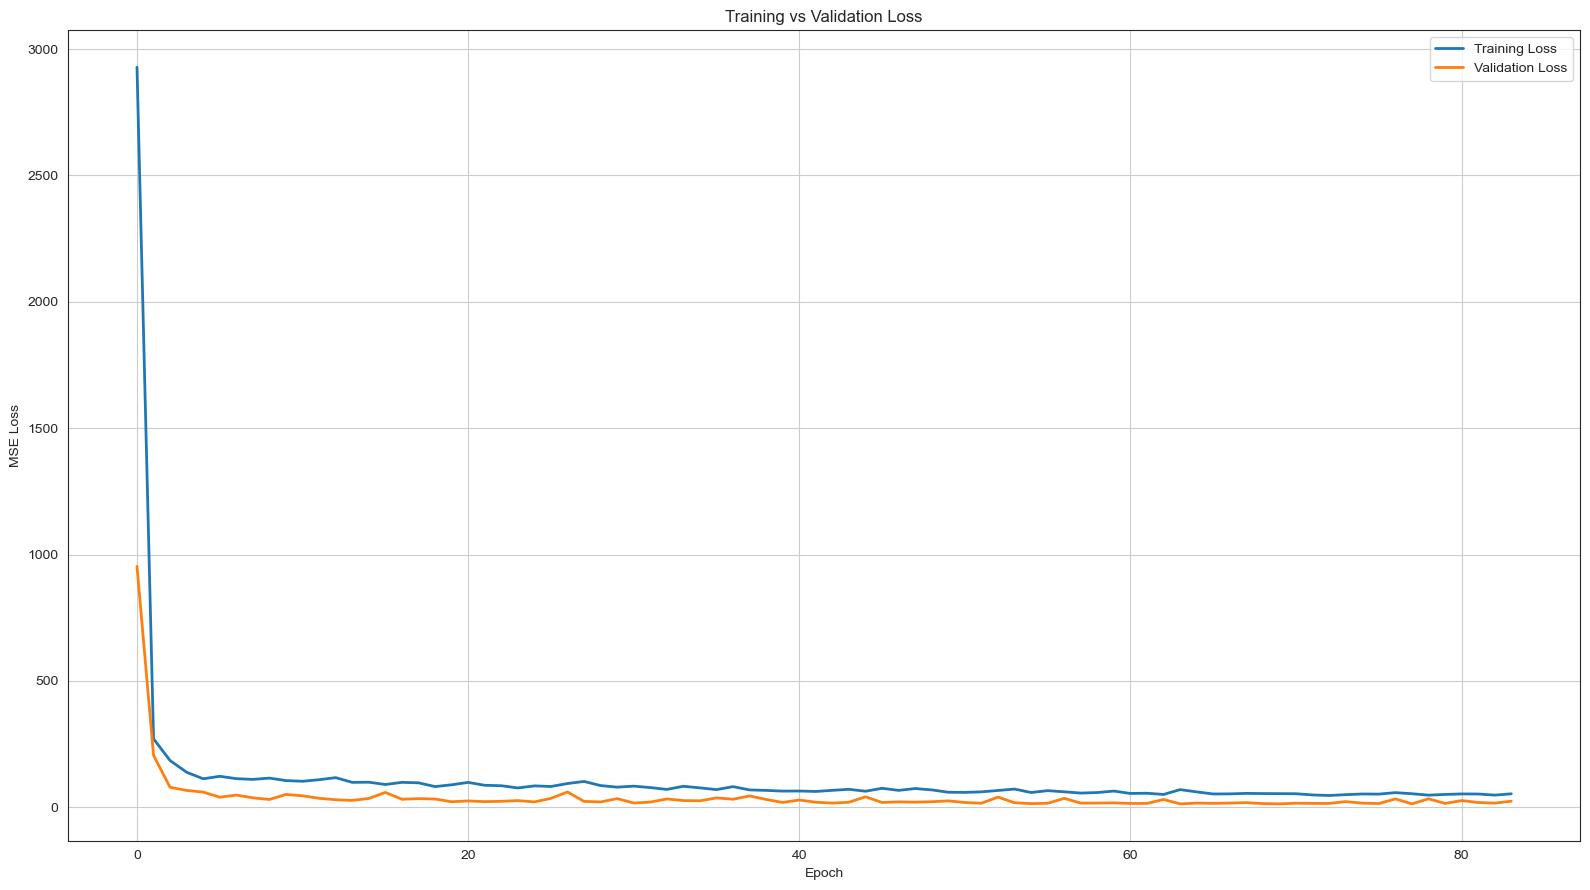

In [ ]:
model = CostPredictor(X_train.shape[1])
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.009, weight_decay=1e-4)

# --- Training Loop with Early Stopping ---
train_losses = []
val_losses = []
best_val_loss = np.inf
patience = 20
wait = 0

for epoch in range(300):
    model.train()
    epoch_train_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_val_tensor)
        val_loss = criterion(val_preds, y_val_tensor)

        
        # Convert to NumPy for metric calculation
        val_pred_np = val_preds.numpy().flatten()
        y_val_np = y_val_tensor.numpy().flatten()

        r2 = r2_score(y_val_np, val_pred_np)
        mae = mean_absolute_error(y_val_np, val_pred_np)
        rmse = np.sqrt(mean_squared_error(y_val_np, val_pred_np))

    train_losses.append(epoch_train_loss / len(train_loader))
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}, Training Loss: {train_losses[-1]:.4f}, "
      f"Validation Loss: {val_loss.item():.4f}, R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    # Early stopping
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break

# --- Plot Losses ---
plt.figure(figsize=(16, 9))
plt.plot(train_losses, label='Training Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()